# CTPP Map

I wanted a visualization of the CTPP data.  I decided to draw a map with lines connecting the place of residence with the place of work.  Here's what I cooked up:

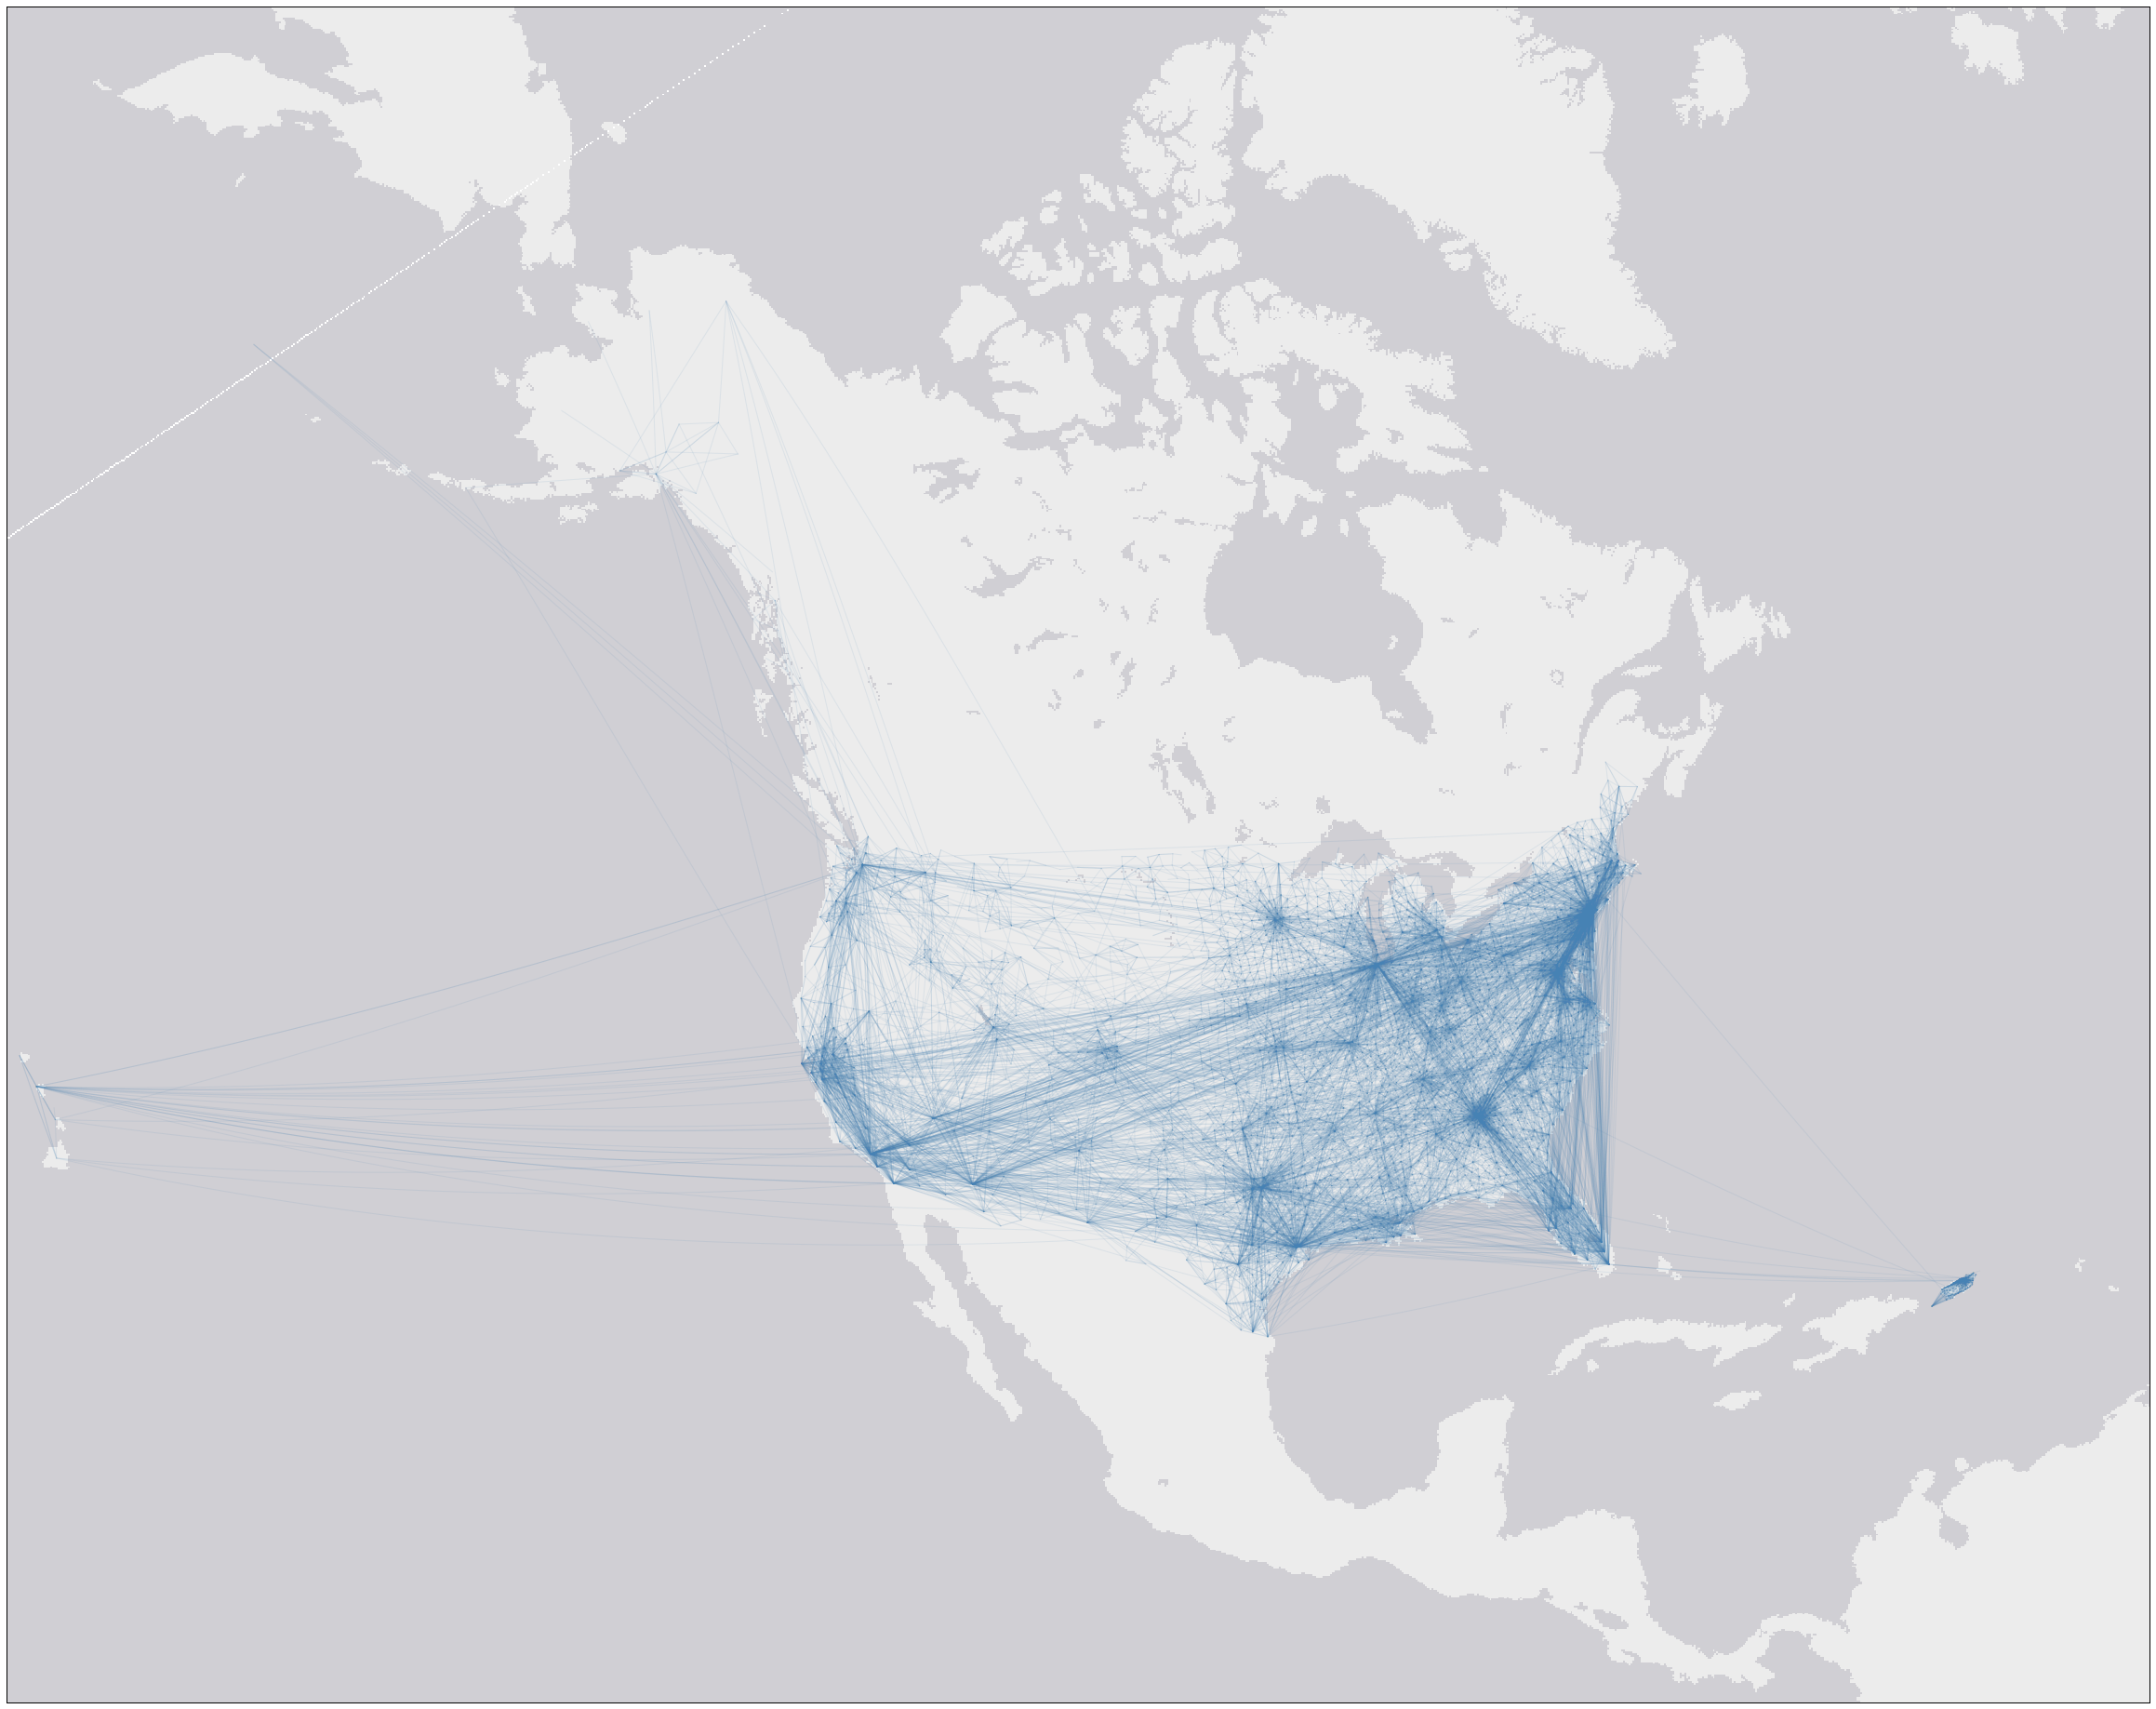

In [1]:
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter

# Read in County Name to FIPS codes data
fips = pd.read_csv('fips.csv')

# Read the TigerLines data (lat and lon and FIPS codes)
tl = pd.read_csv('tl_2015_us_county.csv')
tl = tl[['INTPTLAT','INTPTLON','fips']].dropna()
tl.columns = ['LAT','LON','FIPS']

# Merge the lat and lon with the fips data
fips = pd.merge(fips, tl)
fips = fips[['County','LAT','LON']]

# Read in the CTPP data
ctpp = pd.read_csv('Job_4393.csv', skiprows=2)
ctpp = ctpp.drop('Unnamed: 4', 1)
ctpp = ctpp[ctpp['Output'] == 'Estimate']
ctpp['Workers 16 and Over'] = pd.to_numeric(ctpp['Workers 16 and Over'], errors='coerce')
ctpp = ctpp[['RESIDENCE','WORKPLACE','Workers 16 and Over']].dropna()

# Add residence lat and lon
fips.columns = ['RESIDENCE','RLAT','RLON']
ctpp = pd.merge(ctpp, fips)

# Add workplace lat and lon
fips.columns = ['WORKPLACE','WLAT','WLON']
ctpp = pd.merge(ctpp, fips)

ctpp = ctpp[ctpp['Workers 16 and Over']>=50]

# create the figure and axes instances.
fig = plt.figure(figsize=(40, 40))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

m = Basemap(llcrnrlon=-145.5, llcrnrlat=1., urcrnrlon=-2.566, urcrnrlat=46.352,\
            rsphere=(6378137.00, 6356752.3142),\
            resolution='l', area_thresh=1000., projection='lcc',\
            lat_1=50., lon_0=-107., ax=ax)

m.drawlsmask(land_color='#ececec', ocean_color='#d0cfd4', resolution='l')

line_color = colorConverter.to_rgba('steelblue', alpha=0.1)
               
for index, row in ctpp.iterrows():
    m.drawgreatcircle( row['RLON'], row['RLAT'], row['WLON'], row['WLAT'], linewidth=1, color=line_color)
    
plt.show()